In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
STATS_CSV = "Seasons_Stats.csv"
PLAYER_DATA_CSV = "player_data.csv"
#Read data
stats = pd.read_csv(STATS_CSV)
#Only keep players that have played many minutes, are in the 5 major positions
pos = ['C', 'PF', 'PG', 'SG', 'SF']
stats = stats[stats['MP'] >= 1750]
stats = stats[stats['Pos'].isin(pos)]
#Only keep useful columns
stats = stats[['Pos', 'Age', 'TS%', '3PAr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'USG%', 'FG%', '3P%', '2P%', 'FT%']]
#Drop rows with missing data
stats = stats.dropna(0)

In [3]:
stats.shape

(5101, 13)

In [4]:
stats

,Pos,Age,TS%,3PAr,TRB%,AST%,STL%,BLK%,USG%,FG%,3P%,2P%,FT%
5727,C,32.0,0.639,0.001,15.4,16.5,1.2,4.6,24.1,0.604,0.000,0.604,0.765
5729,C,25.0,0.571,0.002,15.4,21.6,2.3,1.4,21.9,0.531,0.000,0.533,0.797
5730,PG,31.0,0.574,0.023,3.8,30.2,1.7,0.2,17.0,0.482,0.222,0.488,0.830
5734,SF,25.0,0.532,0.043,13.1,9.7,1.7,0.8,21.6,0.495,0.340,0.502,0.753
5735,SF,28.0,0.533,0.004,10.1,15.9,1.7,1.1,17.3,0.505,0.333,0.506,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,PG,28.0,0.554,0.300,17.1,57.3,2.3,0.9,41.7,0.425,0.343,0.459,0.845
24658,SF,21.0,0.534,0.184,6.3,10.6,1.4,0.8,29.0,0.452,0.356,0.473,0.760
24667,SG,30.0,0.593,0.447,5.5,19.9,1.9,0.8,29.1,0.429,0.365,0.480,0.880
24670,PF,30.0,0.551,0.503,11.9,7.1,1.3,2.0,16.3,0.422,0.350,0.494,0.873


In [5]:
for p in pos:
    print(p + ": ", stats[stats['Pos'] == p].shape[0])

C:  722
PF:  1010
PG:  1106
SG:  1133
SF:  1130


In [6]:
#Get and normalize the features
X = stats.drop(['Pos'], axis=1)
feature_labels = X.columns
X = X.to_numpy()
#normalize(X, copy=False)
X_scaled = StandardScaler().fit(X).transform(X)

#Get and normalize the target
y = stats['Pos']
for i in range(5):
    y = y.replace(to_replace=pos[i], value=i)
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=21)

In [7]:
X_scaled.shape

(5101, 12)

In [8]:
model = LogisticRegression(penalty='none', multi_class='multinomial', class_weight='balanced', max_iter=12000)
model.fit(X_train,y_train)
acc_test = model.score(X_test, y_test)
acc_train = model.score(X_train, y_train)
print(acc_test, acc_train)

0.7084323040380047 0.7114427860696517


In [9]:
coefs = model.coef_

In [10]:
def show_weights(mat):
    for i in range(mat.shape[0]):
        print("==============================")
        print(pos[i]) #constant pos
        for j in range(mat.shape[1]):
            print(feature_labels[j], ": ", mat[i][j])

In [11]:
for p in pos:
    print(p, stats[stats['Pos'] == p]['3PAr'].mean())

C 0.02563850415512466
PF 0.08563465346534653
PG 0.2202839059674503
SG 0.2362992056487202
SF 0.1942592920353982


In [12]:
show_weights(coefs)

C
Age :  0.7080926426552995
TS% :  -0.07220445454658359
3PAr :  -0.4200126223269753
TRB% :  4.107131534926769
AST% :  -1.170776730903545
STL% :  -1.2910532641393162
BLK% :  1.5744894302398977
USG% :  -0.006402094628633014
FG% :  0.9643271773884975
3P% :  0.04823839009830327
2P% :  -0.7381985206551607
FT% :  -0.03714652654472604
PF
Age :  0.4108300850827754
TS% :  -0.17777023680045104
3PAr :  0.10150000947815438
TRB% :  3.519560530504613
AST% :  -1.444582973390547
STL% :  -0.6856045101333633
BLK% :  0.7685294244270897
USG% :  0.3049842355995918
FG% :  0.1876638671276515
3P% :  0.13110235547376395
2P% :  0.060186400171585816
FT% :  -0.09326752236731471
PG
Age :  -0.8301151964038265
TS% :  -0.03768582610465162
3PAr :  0.8196717987681047
TRB% :  -4.892110825118649
AST% :  3.485064316654887
STL% :  1.1392389656577737
BLK% :  -2.178442468817056
USG% :  -0.8577922358927168
FG% :  0.17606385926378243
3P% :  -0.6375335474124065
2P% :  -0.4084207511597487
FT% :  0.17354727521848404
SG
Age :  -0.

In [13]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [14]:
# Try different C values if using penalty
def model_and_graph(penalty, solver, random_state, X_tr, y_tr, X_ts, y_ts, title):
    tr_acc = []
    ts_acc = []
    for c in cVals:
        model = LogisticRegression(penalty=penalty, C=c, solver=solver, random_state=random_state, multi_class='multinomial', max_iter=12000)
        model.fit(X_tr,y_tr)
        ts_acc.append(model.score(X_ts, y_ts))
        tr_acc.append(model.score(X_tr, y_tr))
    for i in range(len(cVals)):
        print("C: ", cVals[i], " Train acc: ", tr_acc[i], " Test acc: ", ts_acc[i])
    plt.plot(cVals,tr_acc,'.-')
    plt.plot(cVals,ts_acc,'.-')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.xscale('log')
    plt.title(title)
    plt.grid()
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.show(block=False)

C:  0.0001  Train acc:  0.22300263388937663  Test acc:  0.21852731591448932
C:  0.001  Train acc:  0.38191395961369623  Test acc:  0.3913301662707839
C:  0.01  Train acc:  0.6646180860403863  Test acc:  0.6757719714964371
C:  0.1  Train acc:  0.7073456248170911  Test acc:  0.7108076009501187
C:  1  Train acc:  0.7088088966930055  Test acc:  0.7119952494061758
C:  10  Train acc:  0.707638279192274  Test acc:  0.7102137767220903
C:  100  Train acc:  0.7079309335674568  Test acc:  0.7102137767220903


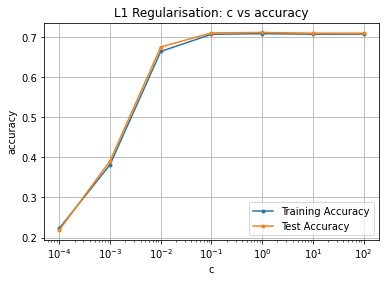

In [15]:
model_and_graph('l1','saga',21,X_train,y_train,X_test,y_test,"L1 Regularisation: c vs accuracy")

C:  0.0001  Train acc:  0.5209247878255779  Test acc:  0.5267220902612827
C:  0.001  Train acc:  0.6262803628914252  Test acc:  0.6318289786223278
C:  0.01  Train acc:  0.6821773485513608  Test acc:  0.6923990498812351
C:  0.1  Train acc:  0.704419081065262  Test acc:  0.7090261282660333
C:  1  Train acc:  0.7085162423178226  Test acc:  0.7125890736342043
C:  10  Train acc:  0.7082235879426397  Test acc:  0.7108076009501187
C:  100  Train acc:  0.7082235879426397  Test acc:  0.7102137767220903


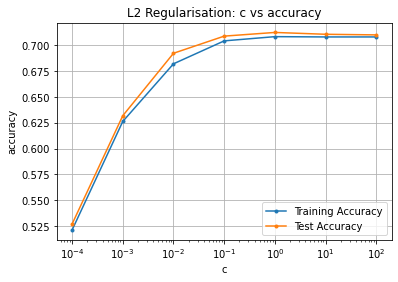

In [16]:
model_and_graph('l2','lbfgs',21,X_train,y_train,X_test,y_test,"L2 Regularisation: c vs accuracy")

# Logistic Regression Using Polynomial Feature Transformation


In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(2)

In [19]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

In [20]:
model_none = LogisticRegression(penalty='none', random_state=21, multi_class='multinomial', max_iter=12000)
model_none.fit(X_transformed_train,y_train)
acc = model_none.score(X_transformed_test, y_test)
print("Transformed, no penalty, test acc: ", acc)
acc = model_none.score(X_transformed_train, y_train)
print("Transformed, no penalty, train acc: ", acc)

Transformed, no penalty, test acc:  0.7185273159144893
Transformed, no penalty, train acc:  0.7582674860989171


C:  0.0001  Train acc:  0.22300263388937663  Test acc:  0.21852731591448932
C:  0.001  Train acc:  0.3585016095990635  Test acc:  0.37232779097387175
C:  0.01  Train acc:  0.6774948785484343  Test acc:  0.684085510688836
C:  0.1  Train acc:  0.7292947029558092  Test acc:  0.7238717339667459
C:  1  Train acc:  0.7547556335967223  Test acc:  0.7250593824228029
C:  10  Train acc:  0.7573895229733685  Test acc:  0.7209026128266033
C:  100  Train acc:  0.7579748317237343  Test acc:  0.7203087885985748


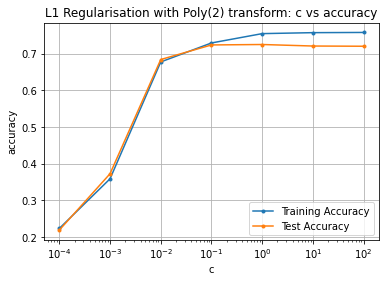

In [21]:
model_and_graph('l1','saga',21,X_transformed_train,y_train,X_transformed_test,y_test,"L1 Regularisation with Poly(2) transform: c vs accuracy")

C:  0.0001  Train acc:  0.6145741878841089  Test acc:  0.6068883610451307
C:  0.001  Train acc:  0.6763242610477027  Test acc:  0.6733966745843231
C:  0.01  Train acc:  0.7278314310798947  Test acc:  0.7191211401425178
C:  0.1  Train acc:  0.7503658179689786  Test acc:  0.7232779097387173
C:  1  Train acc:  0.7597307579748317  Test acc:  0.7244655581947743
C:  10  Train acc:  0.7611940298507462  Test acc:  0.7226840855106889
C:  100  Train acc:  0.7597307579748317  Test acc:  0.7238717339667459


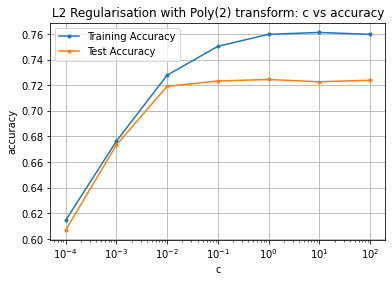

In [22]:
model_and_graph('l2','lbfgs',21,X_transformed_train,y_train,X_transformed_test,y_test,"L2 Regularisation with Poly(2) transform: c vs accuracy")

# Transform before scaling


In [23]:
Xp2 = stats.drop(['Pos'], axis=1).to_numpy()
Xp2 = poly.fit_transform(Xp2)
Xp2_scaled = StandardScaler().fit(Xp2).transform(Xp2)

#Get and normalize the target
y = stats['Pos']
for i in range(5):
    y = y.replace(to_replace=pos[i], value=i)
y = y.to_numpy()
#Y is unchanged but yea
Xp2_train, Xp2_test, yp2_train, yp2_test = train_test_split(Xp2_scaled, y, test_size=0.33, random_state=21)

In [24]:
model_none = LogisticRegression(penalty='none', random_state=21, multi_class='multinomial', max_iter=12000)
model_none.fit(Xp2_train,yp2_train)
acc = model_none.score(Xp2_test, yp2_test)
print("Transformed, no penalty, test acc: ", acc)
acc = model_none.score(Xp2_train, yp2_train)
print("Transformed, no penalty, train acc: ", acc)

Transformed, no penalty, test acc:  0.7173396674584323
Transformed, no penalty, train acc:  0.7609013754755634


c:\users\andrew qu\.virtualenvs\andrew_qu-3aprwf1j\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:  0.0001  Train acc:  0.22300263388937663  Test acc:  0.21852731591448932
C:  0.001  Train acc:  0.38191395961369623  Test acc:  0.3913301662707839
C:  0.01  Train acc:  0.672227099795142  Test acc:  0.6870546318289786
C:  0.1  Train acc:  0.7143693298214808  Test acc:  0.7131828978622328
C:  1  Train acc:  0.7281240854550776  Test acc:  0.7203087885985748
C:  10  Train acc:  0.7433421129645889  Test acc:  0.7214964370546318
C:  100  Train acc:  0.7480245829675154  Test acc:  0.7209026128266033


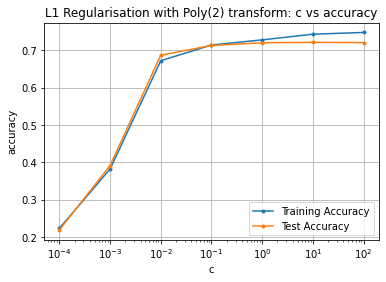

In [25]:
model_and_graph('l1','saga',21,Xp2_train,yp2_train,Xp2_test,yp2_test,"L1 Regularisation with Poly(2) transform: c vs accuracy")

C:  0.0001  Train acc:  0.6347673397717296  Test acc:  0.6383610451306413
C:  0.001  Train acc:  0.6859818554287387  Test acc:  0.6918052256532067
C:  0.01  Train acc:  0.7129060579455663  Test acc:  0.7119952494061758
C:  0.1  Train acc:  0.7240269242025168  Test acc:  0.7149643705463183
C:  1  Train acc:  0.7348551360842844  Test acc:  0.7226840855106889
C:  10  Train acc:  0.7453906935908692  Test acc:  0.7238717339667459
C:  100  Train acc:  0.7576821773485514  Test acc:  0.7209026128266033


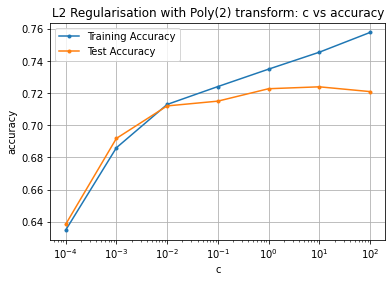

In [26]:
model_and_graph('l2','lbfgs',21,Xp2_train,yp2_train,Xp2_test,yp2_test,"L2 Regularisation with Poly(2) transform: c vs accuracy")